<a href="https://colab.research.google.com/github/janmlew/nobel-dc/blob/main/DC_Project_A_Visual_History_of_Nobel_Prize_Winners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Data loads.

In [ ]:
# global variables
PATH='/content/drive/MyDrive/Colab Notebooks/Project/datasets/'

# Google Drive mount
# drive.mount('/content/drive', force_remount=True)

# Loads
nobel = pd.read_csv(PATH+'nobel.csv') #, index_col='business')
#categories = pd.read_csv(PATH+'categories.csv') #, parse_dates=['dteday'], index_col=0)
#countries = pd.read_csv(PATH+'countries.csv') #, index_col='INSTNM')
#new_businesses = pd.read_csv(PATH+'new_businesses.csv') #, parse_dates=['Show'])

# Task 1: The most Nobel of Prizes

Load the required libraries and the Nobel Prize dataset.

* Import the pandas library as pd.
* Import the seaborn library as sns.
* Import the numpy library as np.
* Use pd.read_csv to read in datasets/nobel.csv and save it into nobel.
* Show at least the first six entries of nobel using the head() method, setting n=6 or greater.

<b>Good to know</b>

Note: a test in this task relies on the expected last output of this cell. In this case, the first six entries of nobel being displayed. If this is not the case, you may run into the following error after ten seconds of the cell being processed: "Your code exceeded the maximum run time permitted."

This project assumes you are familiar with the pandas and seaborn libraries and before taking on this project, we recommend that you have completed the courses Data Manipulation with pandas and Intermediate Data Visualization with Seaborn.

Two cheat sheets that will be useful throughout this project: DataCamp's Seaborn cheat sheet and Data Wrangling with pandas cheat sheet. We recommend that you keep them open in separate tabs to make it easy to refer to them.

In [ ]:
# Loading in required libraries
# ... YOUR CODE FOR TASK 1 ...

# Reading in the Nobel Prize data
#nobel = ...

# Taking a look at the first several winners
# ... YOUR CODE FOR TASK 1 ...
nobel.head(n=6)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany


# Task 2: So, who gets the Nobel Prize?

Count up the Nobel Prizes. Also, split by sex and birth_country.

* Count the number of rows/prizes using the len() function. Use the display() function to display the result.
* Count and display the number of prizes for each sex using the value_counts() method.
* Count the number of prizes for each birth_country using value_counts() and show the top 10 using head(). Do not use display().

Note: a test in this task relies on the expected last output of this cell based on the order of the instructions. If this is not the case, you may run into the following error after ten seconds of the cell being processed: "Your code exceeded the maximum run time permitted."

By default, a Jupyter Notebook (which is where you are working right now) will only show the final output in a cell. If you want to show intermediate results, you will have to use the display() function. See here for an example of how to use value_counts().

Why display() over print()? Try them both out for yourself. You'll find that the output of display() is prettier. :)

In [ ]:
# Display the number of (possibly shared) Nobel Prizes handed
# out between 1901 and 2016
# ... YOUR CODE FOR TASK 2 ...
display(len(nobel))

# Display the number of prizes won by male and female recipients.
# ... YOUR CODE FOR TASK 2 ...
display(nobel['sex'].value_counts())

# Display the number of prizes won by the top 10 nationalities.
# ... YOUR CODE FOR TASK 2 ...
nobel['birth_country'].value_counts().head(n=10)

911

Male      836
Female     49
Name: sex, dtype: int64

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Italy                        17
Russia                       17
Name: birth_country, dtype: int64

# Task 3: USA dominance

Create a DataFrame with two columns: decade and proportion of USA-born Nobel Prize winners that decade.

* Add a usa_born_winner column to nobel, where the value is True when birth_country is "United States of America".
* Add a decade column to nobel for the decade each prize was awarded. Here, np.floor() will come in handy. Ensure the decade column is of type int64.
* Use groupby to group by decade, setting as_index=False. Then isolate the usa_born_winner column and take the mean(). Assign the resulting DataFrame to prop_usa_winners.
* Display prop_usa_winners.

For the decade column, 1953 should become 1950, for example. Calculating this column is a bit tricky, but try to see if you can solve it using the np.floor function. If not, check the hint!

By setting as_index=False, you make sure that both the grouping variable and the calculated mean are included in the resulting DataFrame.

In [ ]:
#help(pd.DataFrame.groupby)

In [ ]:
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel['birth_country']=='United States of America'
nobel['decade'] = np.int64(np.floor(nobel['year']/10)*10)
prop_usa_winners = nobel.groupby(by='decade', as_index=False)['usa_born_winner'].agg('mean')

# Display the proportions of USA born winners per decade
# ... YOUR CODE FOR TASK 3 ...
display(prop_usa_winners)

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


# Task 4: USA dominance, visualized

Plot the proportion of USA born winners per decade.

* Use seaborn to plot prop_usa_winners with decade on the x-axis and usa_born_winner on the y-axis as an sns.lineplot. Assign the plot to ax.
* Fix the y-scale so that it shows percentages using PercentFormatter.

See [here](https://stackoverflow.com/a/36319915/1001848) for a Stack Overflow answer on how PercentFormatter works and [here](https://seaborn.pydata.org/generated/seaborn.lineplot.html) for the documentation of lineplot.

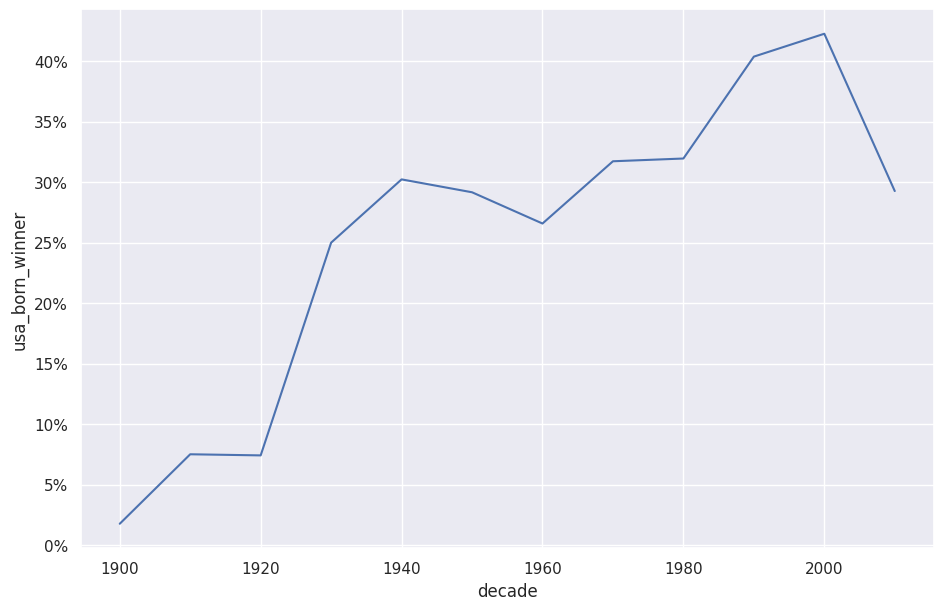

In [ ]:
# Setting the plotting theme
sns.set()
# and setting the size of all plots.
#import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners
ax = sns.lineplot(data=prop_usa_winners, x='decade', y='usa_born_winner')

# Adding %-formatting to the y-axis
#from matplotlib.ticker import PercentFormatter
# ... YOUR CODE FOR TASK 4 ...
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=int()))

plt.show()

# Task 5: What is the gender of a typical Nobel Prize winner?

Plot the proportion of female laureates by decade split by prize category.

* Add the female_winner column to nobel, where the value is True when sex is "Female".
* Use groupby to group by both decade and category, setting as_index=False. Then isolate the female_winner column and take the mean(). Assign the resulting DataFrame to prop_female_winners.
* Copy and paste your seaborn plot from task 4 (including axis formatting code), but plot prop_female_winners and map the category variable to the hue parameter.

This task can be solved by copying and modifying the code from task 3 and 4.

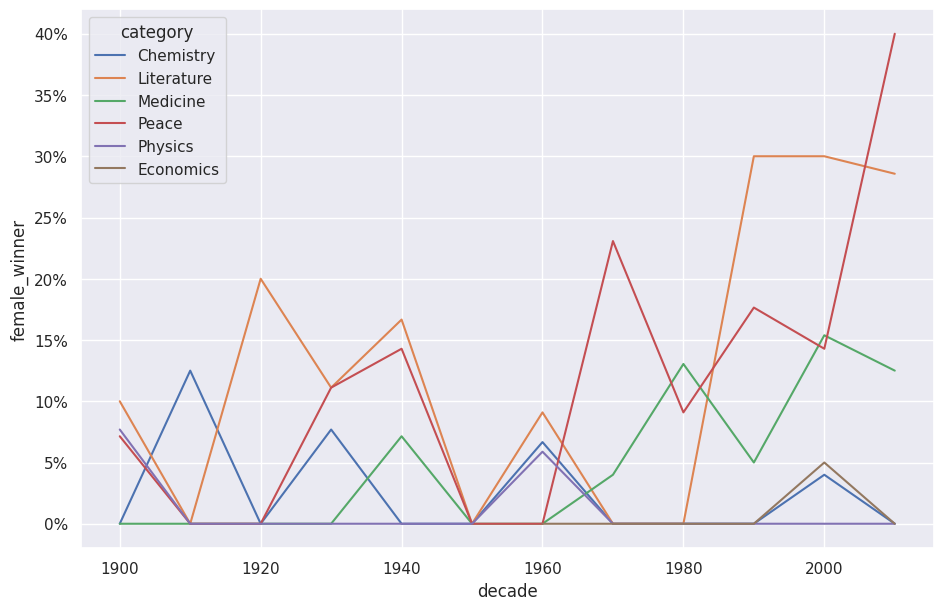

In [ ]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel['sex']=='Female'
prop_female_winners = nobel.groupby(by=['decade', 'category'], as_index=False)['female_winner'].agg('mean')

# Plotting USA born winners with % winners on the y-axis
# ... YOUR CODE FOR TASK 5 ...
sns.set()
plt.rcParams['figure.figsize'] = [11, 7]
ax = sns.lineplot(data=prop_female_winners, x='decade', y='female_winner', hue='category')
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=int()))

plt.show()

# Task 6: The first woman to win the Nobel Prize

Extract and display the row showing the first woman to win a Nobel Prize.

* Select only the rows of 'Female' winners in nobel.
* Using the nsmallest() method with its n and columns parameters, pick out the first woman to get a Nobel Prize.

Note: a test in this task relies on the expected last output of this cell based on the order of the instructions. If this is not the case, you may run into the following error after ten seconds of the cell being processed: "Your code exceeded the maximum run time permitted."

See [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.nsmallest.html) for the documentation of nsmallest().

In [ ]:
# Picking out the first woman to win a Nobel Prize
# ... YOUR CODE FOR TASK 5 ...
nobel[nobel['female_winner']==True].nsmallest(n=1, columns='year')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


# Task 7: Repeat laureates

Extract and display the rows of repeat Nobel Prize winners.

* Use groupby to group nobel by 'full_name'.
* Use the filter method to keep only those rows in nobel with winners with 2 or more prizes.

Note: a test in this task relies on the expected last output of this cell based on the order of the instructions. If this is not the case, you may run into the following error after ten seconds of the cell being processed: "Your code exceeded the maximum run time permitted."

See [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html#filtration) for how to use the filter method.

In [ ]:
# Selecting the laureates that have received 2 or more prizes.
# ... YOUR CODE FOR TASK 5 ...
nobel.groupby(by='full_name', as_index=False).filter(lambda x: len(x) > 1)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1940,False
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1950,False
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1950,False
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",...,Male,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,1950,False
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,...,Male,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1950,False
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1960,False
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1960,False


# Task 8: How old are you when you get the prize?

Calculate and plot the age of each winner when they won their Nobel Prize.

* Convert the nobel['birth_date'] column to datetime using pd.to_datetime.
* Add a new column nobel['age'] that contains the age of each winner when they got the prize. That is, year of prize win minus birth year.
* Use sns.lmplot (not sns.lineplot) to make a plot with year on the x-axis and age on the y-axis.

Note: a test in this task relies on the expected last output of this cell based on the order of the instructions. If this is not the case, you may run into the following error after ten seconds of the cell being processed: "Your code exceeded the maximum run time permitted."

To get the year from a datetime column you need to use access the dt.year value. Here is an example:

> a_data_frame['a_datatime_column'].dt.year


Seaborn's lmplot is a 2D scatterplot with an optional overlaid regression line. This type of plot is useful for [visualizing linear relationships](https://seaborn.pydata.org/tutorial/regression.html).

To make the plot prettier, add the arguments lowess=True, aspect=2, and line_kws={'color' : 'black'}.

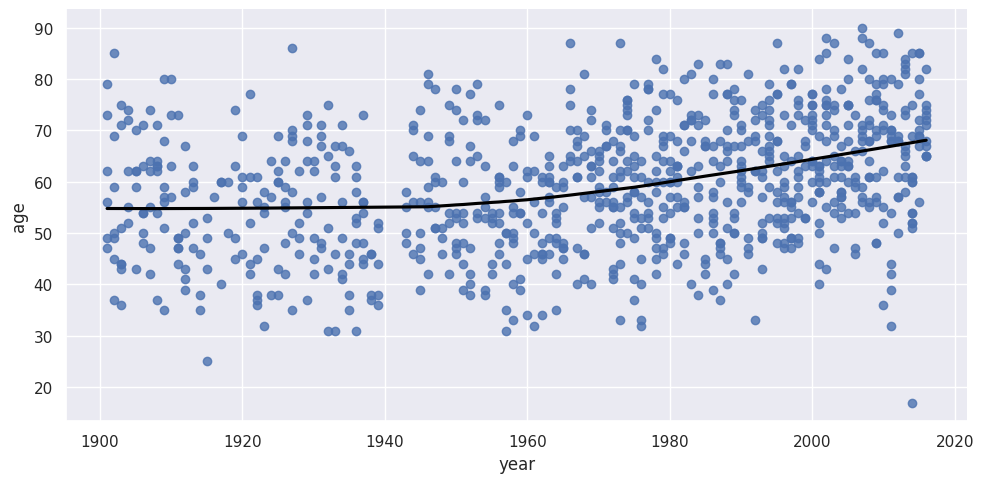

In [ ]:
# Converting birth_date from String to datetime
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])

# Calculating the age of Nobel Prize winners
nobel['age'] = nobel['year']-nobel['birth_date'].dt.year

# Plotting the age of Nobel Prize winners
sns.lmplot(data=nobel, x='year', y='age', lowess=True, aspect=2, line_kws={'color' : 'black'})

# Task 9: Age differences between prize categories

Plot how old winners are within the different price categories.

* As before, use sns.lmplot to make a plot with year on the x-axis and age on the y-axis. But this time, make one plot per prize category by setting the row argument to 'category'.

Note: a test in this task relies on the expected last output of this cell based on the order of the instructions. If this is not the case, you may run into the following error after ten seconds of the cell being processed: "Your code exceeded the maximum run time permitted."

This is the same plot as in task 8, except with the added row= argument (examples in the official Seaborn documentation [here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)).

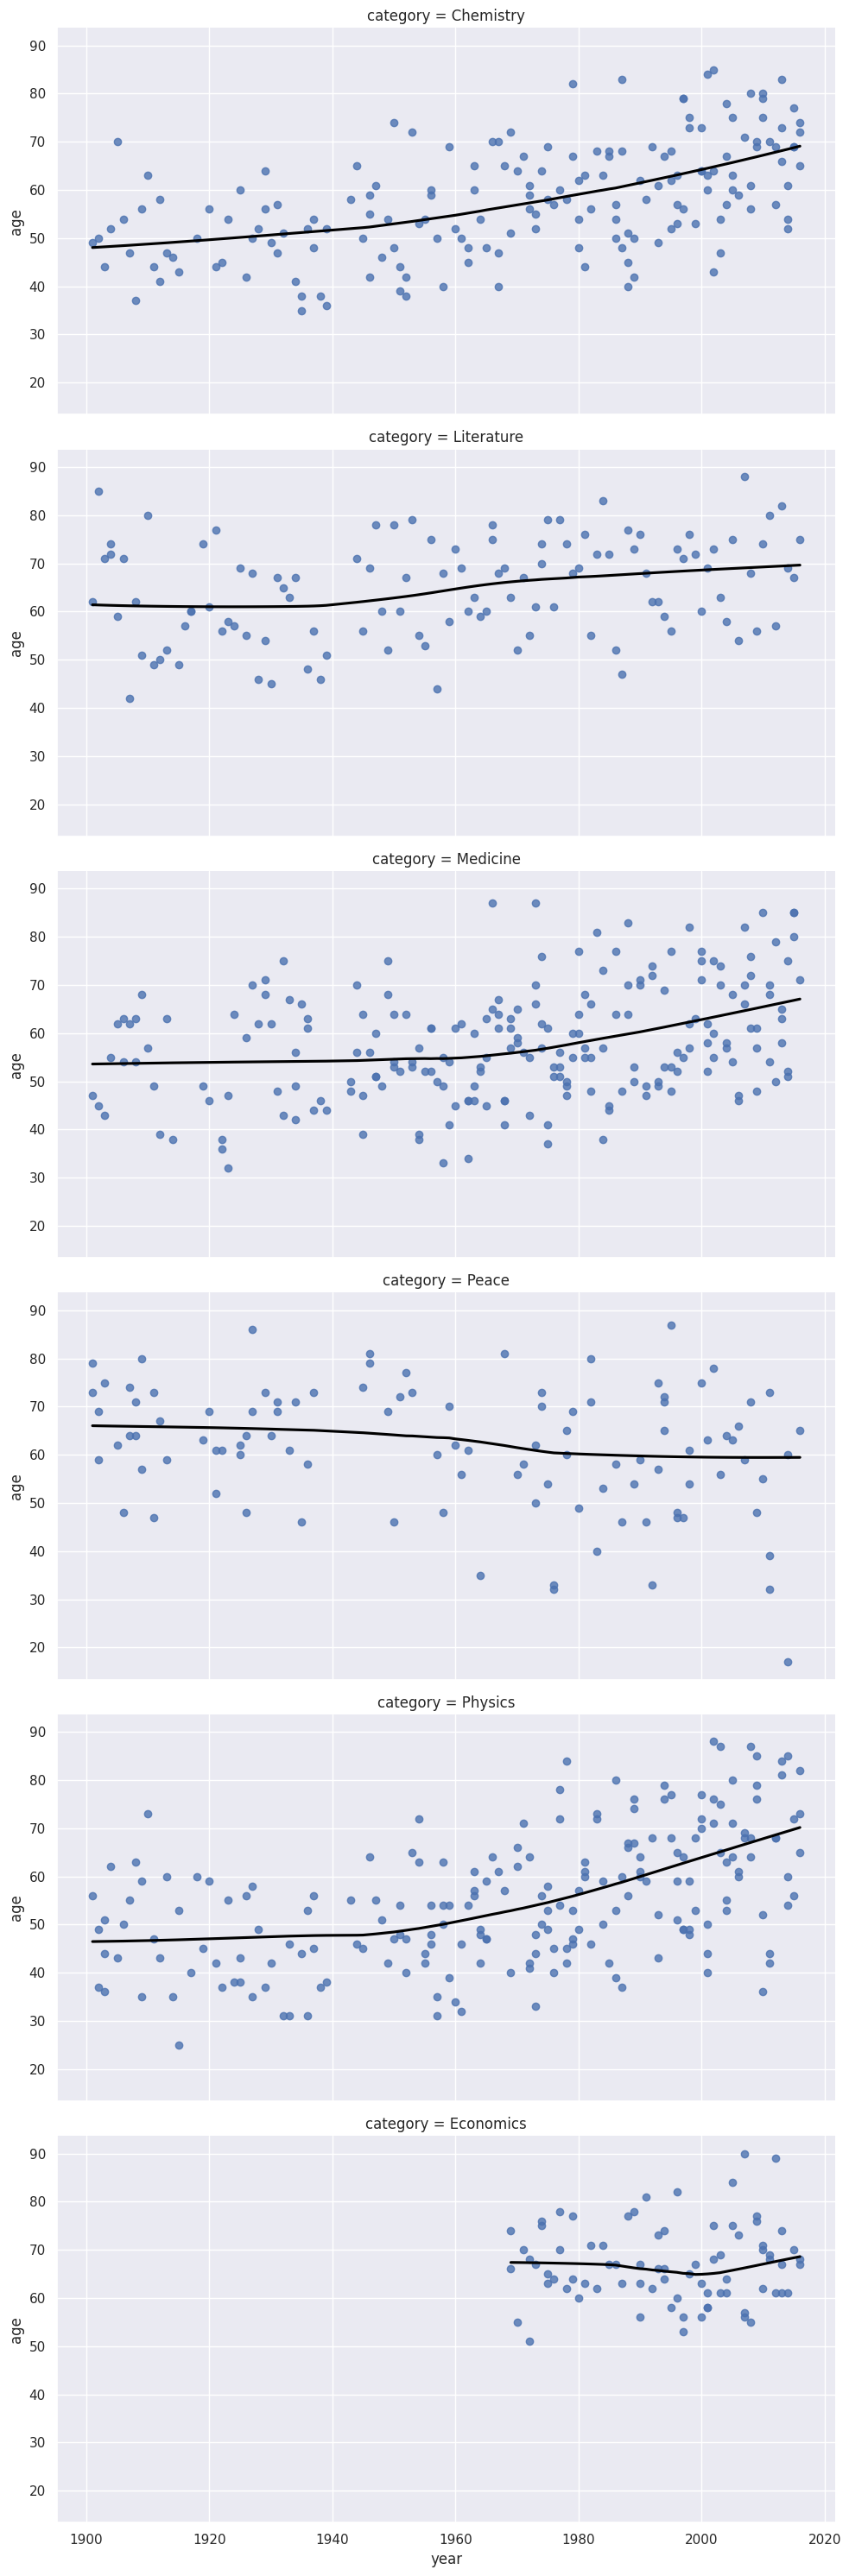

In [ ]:
# Same plot as above, but separate plots for each type of Nobel Prize
# ... YOUR CODE FOR TASK 9 ...
sns.lmplot(data=nobel, x='year', y='age', lowess=True, aspect=2, line_kws={'color' : 'black'}, row='category')

# Task 10: Oldest and youngest winners

Pick out the rows of the oldest and the youngest winner of a Nobel Prize.

* Use nlargest() to pick out and display the row of the oldest winner.
* Use nsmallest() to pick out and display the row of the youngest winner.

Note: a test in this task relies on the expected last output of this cell based on the order of the instructions. If this is not the case, you may run into the following error after ten seconds of the cell being processed: "Your code exceeded the maximum run time permitted."

As before, you will need to use display() to display more than the last output of the cell. [Here is the documentation for nsmallest](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.nsmallest.html) and [n_largest](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.nlargest.html).

In [ ]:
# The oldest winner of a Nobel Prize as of 2016
# ... YOUR CODE FOR TASK 10 ...
display(nobel.nlargest(n=1, columns='age'))

# The youngest winner of a Nobel Prize as of 2016
# ... YOUR CODE FOR TASK 10 ...
display(nobel.nsmallest(n=1, columns='age'))

,year,category,prize,motivation,prize_share,...,death_country,usa_born_winner,decade,female_winner,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,...,United States of America,False,2000,False,90.0


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,NaN,False,2010,True,17.0


# Task 11: You get a prize!

* Assign the name of the youngest winner of a Nobel Prize to youngest_winner. The first name will suffice.

**If you want to know more**

The Nobel Prize dataset is rich, and this project just scratched the surface -- there is much more to explore! After you have completed this project, you can download it and continue exploring on your own! To do that you will have to install Jupyter Notebooks. Here are instructions for [how to install the Jupyter Notebook interface](http://jupyter.org/install.html). Good luck!

In [ ]:
youngest_winner = 'Malala Yousafzai'